In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid", palette="colorblind")

In [2]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
data_train_t = np.zeros((len(seeds), 2750))
data_train_y = np.zeros((len(seeds), 2750))
data_outliers = np.zeros((len(seeds), 10))
results_m_intel = np.zeros((len(seeds), 2750))
results_m_lintel = np.zeros((len(seeds), 2750))
results_s_intel = np.zeros((len(seeds), 2750))
results_s_lintel = np.zeros((len(seeds), 2750))
results_t_intel = np.zeros((len(seeds),))
results_t_lintel = np.zeros((len(seeds),))
results_pll_intel = np.zeros((len(seeds),))
results_pll_lintel = np.zeros((len(seeds),))
results_nmse_intel = np.zeros((len(seeds),))
results_nmse_lintel = np.zeros(
    (len(seeds)),
)

for seed in seeds:
    data = np.load(f"results/experiment_1_seed_{seed}_geom_True_data.npz")
    train_t = data["train_t"].squeeze()
    pretrain_t = data["pretrain_t"].squeeze()
    train_y = data["train_y"]
    pretrain_y = data["pretrain_y"]
    true_outliers = data["true_outliers"]

    data_train_t[seed, :] = train_t
    data_train_y[seed, :] = train_y
    data_outliers[seed, :] = true_outliers

    res_lintel = np.load(
        f"results/experiment_1_seed_{seed}_geom_True_lintel_results.npz"
    )
    m_lintel = res_lintel["ms"]
    s_lintel = res_lintel["ss"]
    o_lintel = res_lintel["ots"]
    w_lintel = res_lintel["ws"]
    t_lintel = res_lintel["t_lintel"]

    res_intel = np.load(
        f"results/experiment_1_seed_{seed}_geom_True_intel_results.npz")
    m_intel = res_intel["ms"]
    s_intel = res_intel["ss"]
    o_intel = res_intel["ots"]
    w_intel = res_intel["ws"]
    t_intel = res_intel["t_intel"]

    results_m_lintel[seed, :] = m_lintel
    results_s_lintel[seed, :] = s_lintel
    results_m_intel[seed, :] = m_intel
    results_s_intel[seed, :] = s_intel
    results_t_lintel[seed] = t_lintel
    results_t_intel[seed] = t_intel

    intel_pll = stats.norm.logpdf(train_y, m_intel, np.sqrt(s_intel))
    lintel_pll = stats.norm.logpdf(train_y, m_lintel, np.sqrt(s_lintel))
    results_pll_intel[seed] = np.delete(intel_pll, true_outliers).mean()
    results_pll_lintel[seed] = np.delete(lintel_pll, true_outliers).mean()

    intel_nmse = (train_y - m_intel) ** 2 / np.var(train_y)
    lintel_nmse = (train_y - m_lintel) ** 2 / np.var(train_y)
    results_nmse_intel[seed] = np.delete(intel_nmse, true_outliers).mean()
    results_nmse_lintel[seed] = np.delete(lintel_nmse, true_outliers).mean()

In [4]:
np.mean(results_pll_intel), np.std(results_pll_intel), np.mean(
    results_pll_lintel
), np.std(results_pll_lintel)

(-0.37738969389031124,
 0.04922456030289805,
 -0.3683566178578995,
 0.03907857272195923)

In [5]:
stats.wilcoxon(results_pll_intel, results_pll_lintel, alternative="less")

WilcoxonResult(statistic=2.0, pvalue=0.0029296875)

In [6]:
np.mean(results_nmse_intel), np.std(results_nmse_intel), np.mean(
    results_nmse_lintel
), np.std(results_nmse_lintel)

(0.05545921564409443,
 0.014053647799047487,
 0.05446326347560423,
 0.013150085311003373)

In [7]:
stats.wilcoxon(results_nmse_intel, results_nmse_lintel, alternative="greater")

WilcoxonResult(statistic=54.0, pvalue=0.001953125)

In [8]:
np.mean(results_t_intel), np.std(results_t_intel), np.mean(results_t_lintel), np.std(
    results_t_lintel
)

(32.334653568267825,
 0.49026153067331085,
 5.1032544612884525,
 0.08673372810271064)

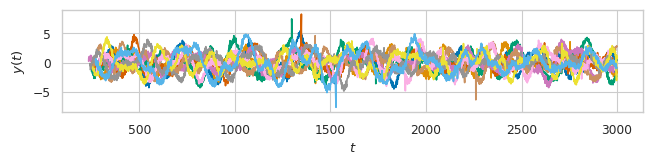

In [9]:
fig, ax1 = plt.subplots(figsize=(7.5, 1.33))
ax1.plot(data_train_t.T, data_train_y.T)
ax1.set_ylabel("$y(t)$")
ax1.set_xlabel("$t$")
plt.savefig(
    "plots/experiment_1_functions.png", dpi=600, transparent=False, bbox_inches="tight"
)

In [10]:
data_train_t = np.zeros((len(seeds), 2750))
data_train_y = np.zeros((len(seeds), 2750))
data_outliers = np.zeros((len(seeds), 10))
results_aa_m_intel = np.zeros((len(seeds), 2750))
results_aa_m_lintel = np.zeros((len(seeds), 2750))
results_aa_s_intel = np.zeros((len(seeds), 2750))
results_aa_s_lintel = np.zeros((len(seeds), 2750))
results_aa_t_intel = np.zeros((len(seeds),))
results_aa_t_lintel = np.zeros((len(seeds),))
results_aa_pll_intel = np.zeros((len(seeds),))
results_aa_pll_lintel = np.zeros((len(seeds),))
results_aa_nmse_intel = np.zeros((len(seeds),))
results_aa_nmse_lintel = np.zeros(
    (len(seeds)),
)

for seed in seeds:
    data = np.load(f"results/experiment_1_seed_{seed}_geom_False_data.npz")
    train_t = data["train_t"].squeeze()
    pretrain_t = data["pretrain_t"].squeeze()
    train_y = data["train_y"]
    pretrain_y = data["pretrain_y"]
    true_outliers = data["true_outliers"]

    data_train_t[seed, :] = train_t
    data_train_y[seed, :] = train_y
    data_outliers[seed, :] = true_outliers

    res_lintel = np.load(
        f"results/experiment_1_seed_{seed}_geom_False_lintel_results.npz"
    )
    m_lintel = res_lintel["ms"]
    s_lintel = res_lintel["ss"]
    o_lintel = res_lintel["ots"]
    w_lintel = res_lintel["ws"]
    t_lintel = res_lintel["t_lintel"]

    res_intel = np.load(
        f"results/experiment_1_seed_{seed}_geom_False_intel_results.npz"
    )
    m_intel = res_intel["ms"]
    s_intel = res_intel["ss"]
    o_intel = res_intel["ots"]
    w_intel = res_intel["ws"]
    t_intel = res_intel["t_intel"]

    results_aa_m_lintel[seed, :] = m_lintel
    results_aa_s_lintel[seed, :] = s_lintel
    results_aa_m_intel[seed, :] = m_intel
    results_aa_s_intel[seed, :] = s_intel
    results_aa_t_lintel[seed] = t_lintel
    results_aa_t_intel[seed] = t_intel

    intel_pll = stats.norm.logpdf(train_y, m_intel, np.sqrt(s_intel))
    lintel_pll = stats.norm.logpdf(train_y, m_lintel, np.sqrt(s_lintel))
    results_aa_pll_intel[seed] = np.delete(intel_pll, true_outliers).mean()
    results_aa_pll_lintel[seed] = np.delete(lintel_pll, true_outliers).mean()

    intel_nmse = (train_y - m_intel) ** 2 / np.var(train_y)
    lintel_nmse = (train_y - m_lintel) ** 2 / np.var(train_y)
    results_aa_nmse_intel[seed] = np.delete(intel_nmse, true_outliers).mean()
    results_aa_nmse_lintel[seed] = np.delete(lintel_nmse, true_outliers).mean()

In [11]:
np.mean(results_aa_pll_intel), np.std(results_aa_pll_intel), np.mean(
    results_aa_pll_lintel
), np.std(results_aa_pll_lintel)

(-0.37480561745195906,
 0.049096125065551804,
 -0.36540738759837654,
 0.038281840940365575)

In [12]:
stats.wilcoxon(results_aa_pll_intel, results_aa_pll_lintel, alternative="less")

WilcoxonResult(statistic=2.0, pvalue=0.0029296875)

In [13]:
stats.wilcoxon(results_pll_lintel, results_aa_pll_lintel, alternative="less")

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

In [14]:
np.mean(results_aa_nmse_intel), np.std(results_aa_nmse_intel), np.mean(
    results_aa_nmse_lintel
), np.std(results_aa_nmse_lintel)

(0.05536321835517567,
 0.014052633849079663,
 0.054345719573191655,
 0.013137750548840888)

In [15]:
stats.wilcoxon(results_aa_nmse_intel,
               results_aa_nmse_lintel, alternative="greater")

WilcoxonResult(statistic=54.0, pvalue=0.001953125)

In [16]:
np.mean(results_aa_t_intel), np.std(results_aa_t_intel), np.mean(
    results_aa_t_lintel
), np.std(results_aa_t_lintel)

(32.327312707901, 0.6791859102165807, 5.438107371330261, 1.100063734520698)

In [17]:
stats.wilcoxon(results_aa_t_lintel, results_t_lintel, alternative="two-sided")

WilcoxonResult(statistic=27.0, pvalue=1.0)